Optimal number of components to retain 95% variance: 14


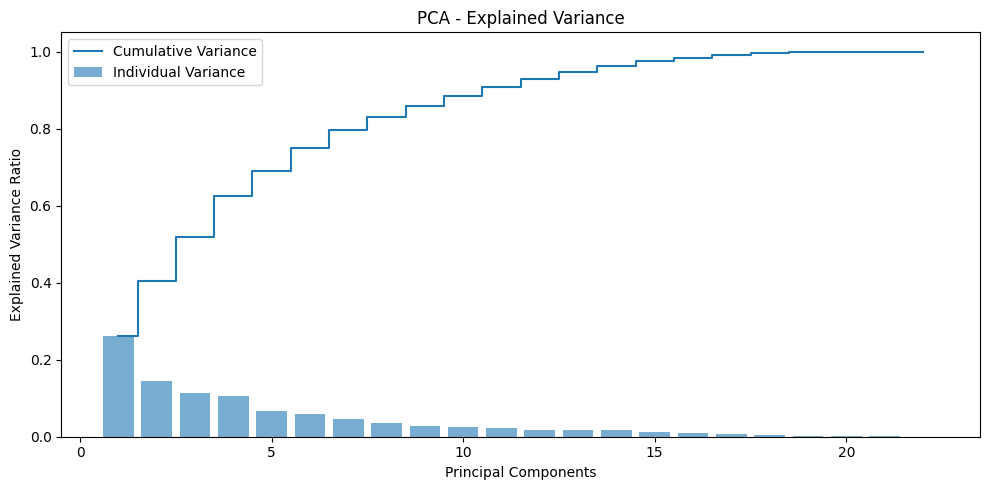

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x_train_prep = 'E:/Heart_Disease_Project/data/x_train_prep.csv'
x_test_prep = 'E:/Heart_Disease_Project/data/x_test_prep.csv'

x_train_prep = pd.read_csv(x_train_prep)
x_test_prep = pd.read_csv(x_test_prep)

# Step 1: Fit PCA on training data
pca = PCA()
x_train_pca = pca.fit_transform(x_train_prep)
x_test_pca = pca.transform(x_test_prep)

# Step 2: Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Step 3: Determine optimal number of components (e.g., keep 95% variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")

# Step 4: Transform again with optimal number of components
pca_opt = PCA(n_components=optimal_components)
x_train_pca_opt = pca_opt.fit_transform(x_train_prep)
x_test_pca_opt = pca_opt.transform(x_test_prep)

# Save PCA-transformed datasets
pd.DataFrame(x_train_pca_opt).to_csv('x_train_pca.csv', index=False)
pd.DataFrame(x_test_pca_opt).to_csv('x_test_pca.csv', index=False)

# Step 5: Visualization
plt.figure(figsize=(10,5))

# Variance per component
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label='Individual Variance')
# Cumulative variance
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative Variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
